# Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/raghunandanms/Documents/Personal/DS/0 Internship/Machine Learning Internship MIP-ML-12/Fast Tag Fraud detection/FastagFraudDetection.csv', encoding='ASCII')
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [3]:
# Checking the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [4]:
# Getting familiarity with all the features
df.describe

<bound method NDFrame.describe of       Transaction_ID        Timestamp Vehicle_Type         FastagID  \
0                  1   1/6/2023 11:20         Bus   FTG-001-ABC-121   
1                  2   1/7/2023 14:55          Car  FTG-002-XYZ-451   
2                  3   1/8/2023 18:25   Motorcycle              NaN   
3                  4    1/9/2023 2:05        Truck  FTG-044-LMN-322   
4                  5   1/10/2023 6:35          Van  FTG-505-DEF-652   
...              ...              ...          ...              ...   
4995            4996   1/1/2023 22:18        Truck  FTG-445-EDC-765   
4996            4997  1/17/2023 13:43          Van  FTG-446-LMK-432   
4997            4998    2/5/2023 5:08        Sedan  FTG-447-PLN-109   
4998            4999  2/20/2023 20:34          SUV  FTG-458-VFR-876   
4999            5000   3/10/2023 0:59         Bus   FTG-459-WSX-543   

     TollBoothID Lane_Type Vehicle_Dimensions  Transaction_Amount  \
0          A-101   Express              Larg

In [5]:
#Checking the missing values
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

### As we can see that the column, FastagID has 549 missing values

In [6]:
#Dropping the missing values since it cannot be imputed, if done it might give us false values.
df=df.dropna()

In [7]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

### As we can see that there are no null values present in any columns.

## Let's us see the unique values of the lanes, vehicles and so

In [8]:
cols = ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Fraud_indicator']

for i in cols:
    print(f'Unique values for: {i}')
    print(df[i].unique())
    print()

Unique values for: Vehicle_Type
['Bus ' 'Car' 'Truck' 'Van' 'Sedan' 'SUV' 'Motorcycle']

Unique values for: TollBoothID
['A-101' 'B-102' 'C-103' 'D-106']

Unique values for: Lane_Type
['Express' 'Regular']

Unique values for: Vehicle_Dimensions
['Large' 'Small' 'Medium']

Unique values for: Fraud_indicator
['Fraud' 'Not Fraud']



In [9]:
df['Fraud_indicator'].value_counts()

Fraud_indicator
Not Fraud    3468
Fraud         983
Name: count, dtype: int64

### As we can see that above target class is imbalanced. We need to balance that later by either SMOTE or other methods.

<Axes: ylabel='count'>

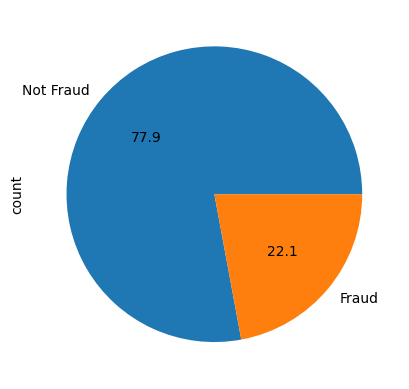

In [10]:
df['Fraud_indicator'].value_counts().plot(kind='pie', autopct='%1.1f')

In [11]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

## Let us do the visualization

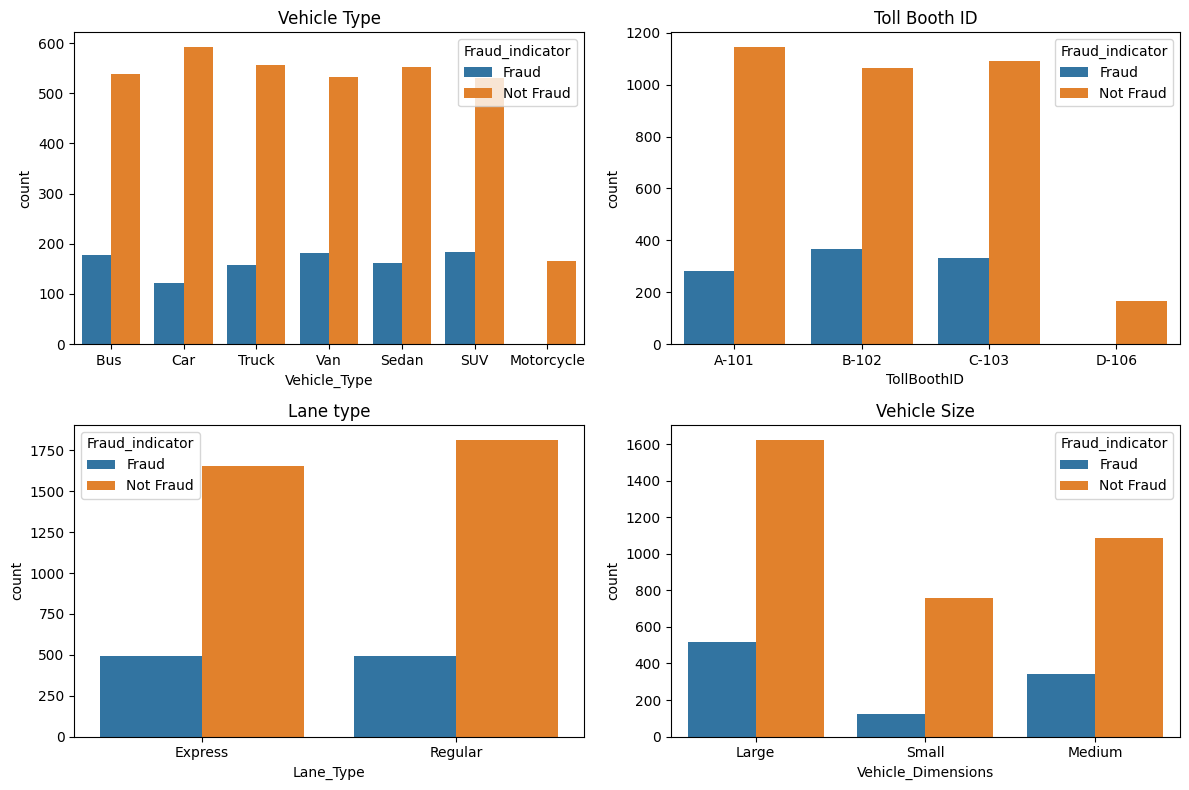

In [12]:
fig, axes = plt.subplots(2,2,figsize=(12,8))

sns.countplot(data=df, x='Vehicle_Type', hue='Fraud_indicator', ax=axes[0,0])
axes[0,0].set_title('Vehicle Type')
sns.countplot(data=df, x='TollBoothID', hue='Fraud_indicator', ax=axes[0,1])
axes[0,1].set_title('Toll Booth ID')
sns.countplot(data=df, x='Lane_Type', hue='Fraud_indicator', ax=axes[1,0])
axes[1,0].set_title('Lane type')
sns.countplot(data=df, x='Vehicle_Dimensions', hue='Fraud_indicator', ax=axes[1,1])
axes[1,1].set_title('Vehicle Size')

plt.tight_layout()

### Certain insights can be drawn from the above charts are:
1. Motocycles are not in fraud list, maybe they are having a separate lane or run free of charge.
2. SUV, Van and Buses are having more number of frauds than the other.
3. Toll both B-102 has a lot of fraudulent cases.
4. Irrespective of express or regular lane, the fraud cases are same.
5. Large vehicles seem to have more cases than medium and small vehicles.

### Since we have the number plate, let us check the fraudulent cases statewise.

In [13]:
df['State_wise']=df['Vehicle_Plate_Number'].str[:2]
df['State_wise'].unique()

array(['KA', 'MH', 'GA', 'AP', 'KL', 'GJ', 'TN', 'DL', 'TS', 'UP', 'RJ',
       'WB', 'HR', 'BR', 'MP'], dtype=object)

In [14]:
fraud_cases=df.loc[df['Fraud_indicator']=='Fraud', 'State_wise'].value_counts()
print(fraud_cases)

State_wise
KA    623
GA     93
MH     92
AP     68
TN     31
GJ     16
KL     14
DL     12
TS      8
RJ      7
BR      6
HR      5
UP      4
WB      2
MP      2
Name: count, dtype: int64


### As we can see from the above list, that the state "Karnataka" has more number of fraudulent cases, followed by Goa, Maharashtra, Andhra Pradesh, Tamil Nadu and so on.

### Fraudulent cases with respect to days of week

In [15]:
#converting time date format
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [16]:
df['DayofWeek']=df['Timestamp'].dt.dayofweek

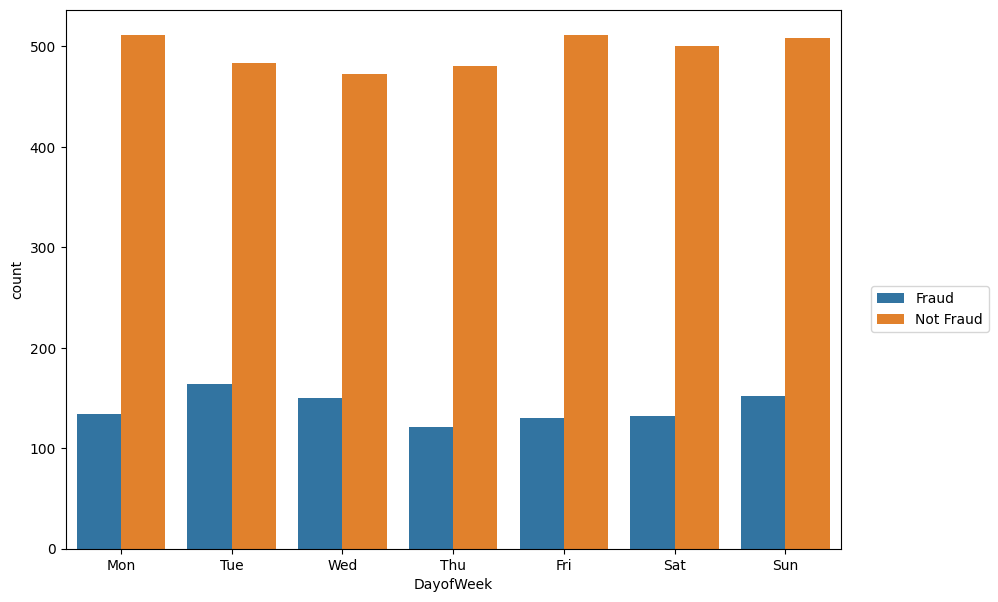

In [17]:
#plotting days of week of fraudulent activities
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='DayofWeek', hue='Fraud_indicator')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun'])
plt.legend(bbox_to_anchor=(1.2,0.5))
plt.show()

In [18]:
fraud_week=df.loc[df['Fraud_indicator']=='Fraud', 'DayofWeek'].value_counts()
print(fraud_week)

DayofWeek
1    164
6    152
2    150
0    134
5    132
4    130
3    121
Name: count, dtype: int64


### As we can see from the above data, we know that 1 means Tuesday, More number of fraud cases are happening at Tuesdays!

In [19]:
df1=df.drop('Timestamp', axis=1)

In [20]:
df1.columns

Index(['Transaction_ID', 'Vehicle_Type', 'FastagID', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Vehicle_Plate_Number',
       'Fraud_indicator', 'State_wise', 'DayofWeek'],
      dtype='object')

### Now let us see the correlation between the numerical columns to understand it better!

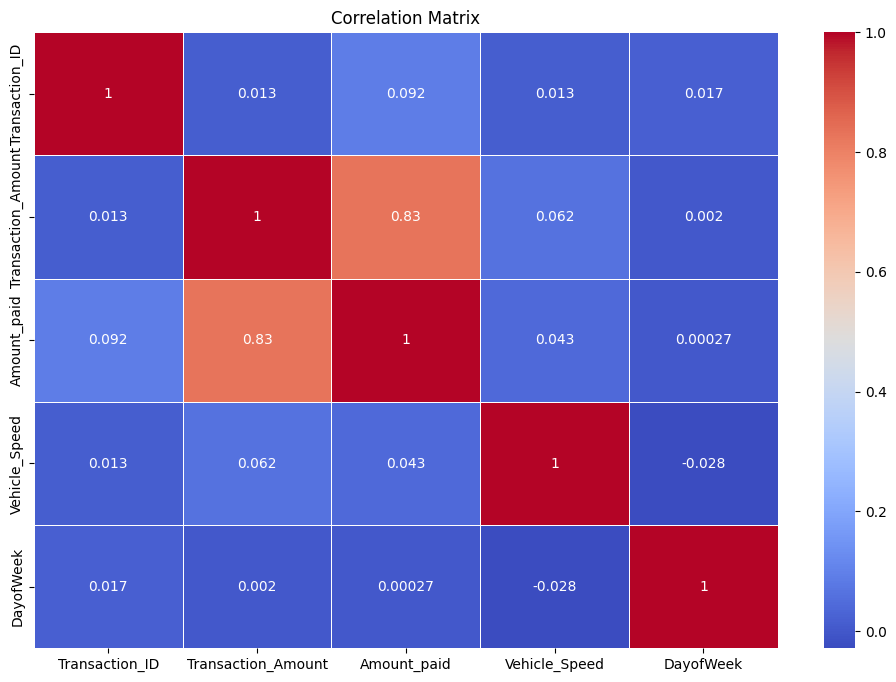

In [21]:
numerical_columns = df1.select_dtypes(include='number').columns

correlation_matrix=df[numerical_columns].corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

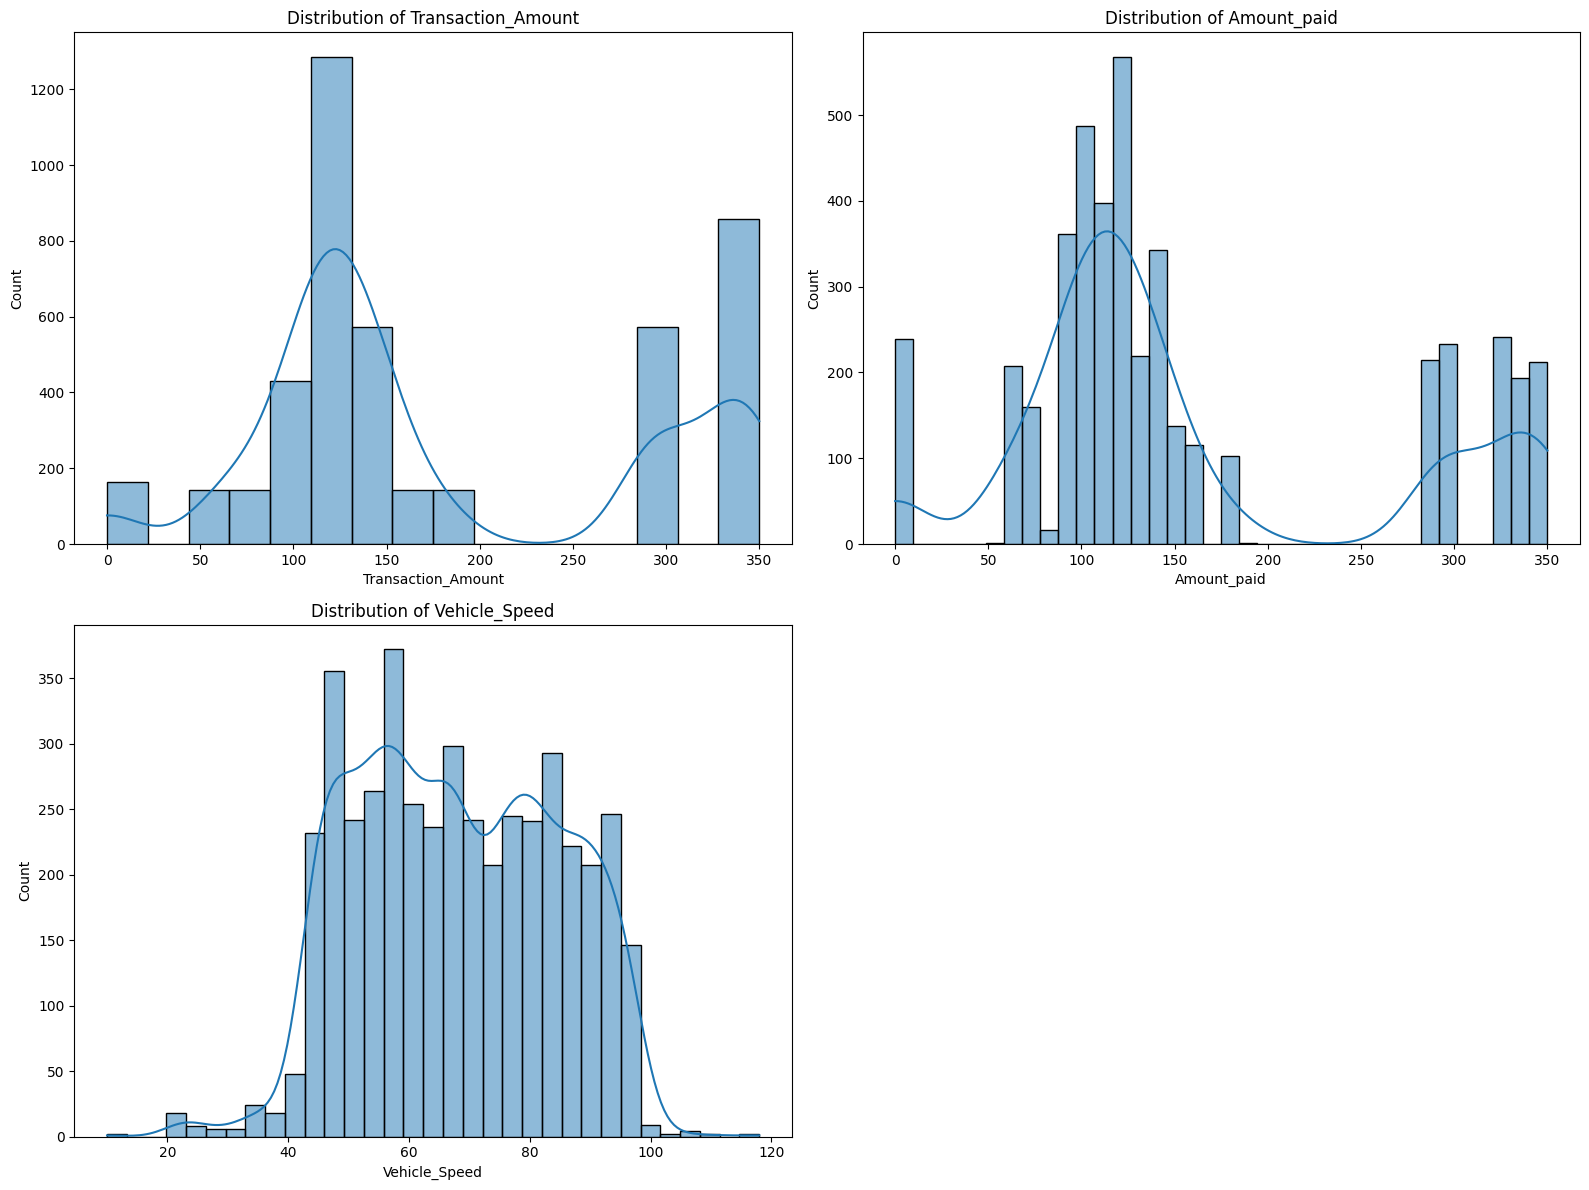

In [22]:
# Plot distributions of numerical features
plt.figure(figsize=(16, 12))
numerical_columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

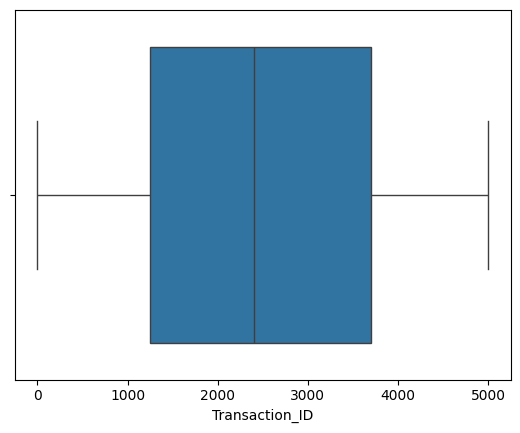

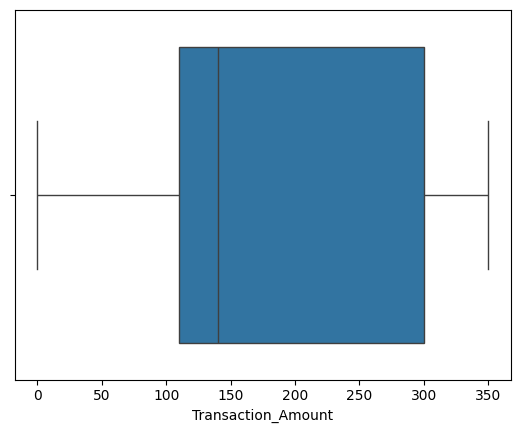

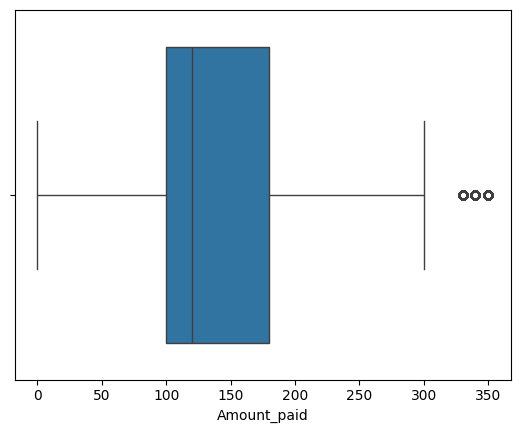

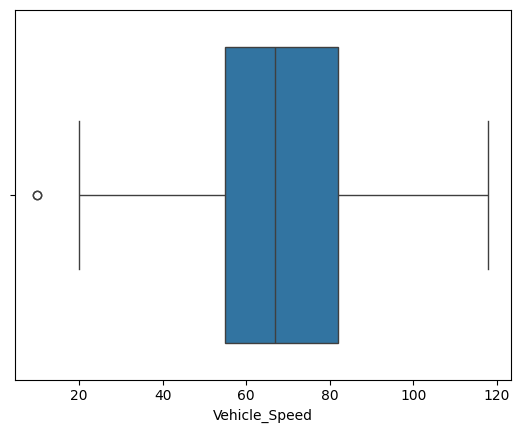

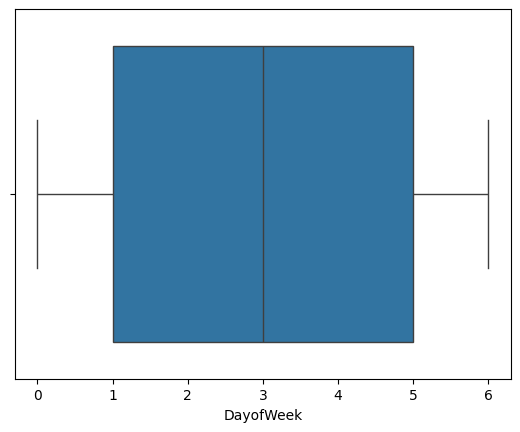

In [23]:
# To check the outliers
num_col=df1.select_dtypes(include='number').columns
for i in num_col:
    sns.boxplot(data=df, x=i)
    plt.show()

## Feature Enigneering: to remove or add one or more columns for the betterment of understanding and modeling.

In [24]:
df3=df1.drop(['Transaction_ID', 'FastagID', 'Geographical_Location', 'Vehicle_Plate_Number'], axis=1)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()
df3['Fraud_indicator'] = label_encoder.fit_transform(df3['Fraud_indicator'])

In [27]:
encoder = LabelEncoder()
df3['Vehicle_Type']=encoder.fit_transform(df3['Vehicle_Type'])

In [28]:
df3['TollBoothID']=encoder.fit_transform(df3['TollBoothID'])

In [29]:
df3['Lane_Type']=encoder.fit_transform(df3['Lane_Type'])

In [30]:
df3['Vehicle_Dimensions']=encoder.fit_transform(df3['Vehicle_Dimensions'])

In [31]:
df3['State_wise']=encoder.fit_transform(df3['State_wise'])

In [32]:
X=df3.drop('Fraud_indicator', axis=1)
y=df3['Fraud_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Handling imbalance data

In [33]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=27)
smote_X_train, smote_y_train=smote.fit_resample(X_train, y_train)
smote_X_test, smote_y_test=smote.fit_resample(X_test, y_test)

In [34]:
print(f'Shape of X_train after resampling is {smote_X_train.shape}')
print(f'Shape of X_test after resampling is {smote_X_test.shape}')
print(f'Shape of y_train after resampling is {smote_y_train.shape}')
print(f'Shape of y_test after resampling is {smote_y_test.shape}')

Shape of X_train after resampling is (5538, 9)
Shape of X_test after resampling is (1398, 9)
Shape of y_train after resampling is (5538,)
Shape of y_test after resampling is (1398,)


## Modeling using ML Algorithms

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr_model=lr.fit(smote_X_train, smote_y_train)
lr_pred=lr_model.predict(smote_X_test)
lr_accuracy=accuracy_score(smote_y_test, lr_pred)
print(lr_accuracy)

0.9799713876967096


In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model=dt.fit(smote_X_train, smote_y_train)
dt_pred=dt_model.predict(smote_X_test)
dt_accuracy = accuracy_score(smote_y_test, dt_pred)
print(dt_accuracy)

0.9949928469241774


In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
rf_model=rfc.fit(smote_X_train, smote_y_train)
rf_pred=rf_model.predict(smote_X_test)
rf_accuracy = accuracy_score(smote_y_test, rf_pred)
print(rf_accuracy)

0.9935622317596566


### Saving the model for deployment

In [38]:
import joblib
joblib.dump(dt_model, 'FastagDTModel.pkl')

['FastagDTModel.pkl']

### Submitted by RMS - Raghunandan M S